# Project description

*You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.*

**Data description**

* —Name
* —Platform
* —Year_of_Release
* —Genre
* —NA_sales (North American sales in USD million)
* —EU_sales (sales in Europe in USD million)
* —JP_sales (sales in Japan in USD million)
* —Other_sales (sales in other countries in USD million)
* —Critic_Score (maximum of 100)
* —User_Score (maximum of 10)
* —Rating (ESRB)
* Data for 2016 may be incomplete.

## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/games.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11467,ToraDora Portable!,PSP,2009.0,Adventure,0.00,0.00,0.08,0.00,NaN,NaN,NaN
13503,Lux-Pain,DS,2008.0,Adventure,0.04,0.00,0.00,0.00,48.0,6.2,T
11138,FIFA Street 3,DS,2008.0,Sports,0.06,0.02,0.00,0.01,56.0,tbd,E
8219,Petz: Horseshoe Ranch,DS,2009.0,Adventure,0.16,0.00,0.00,0.01,NaN,tbd,NaN
14894,The Sims 2: Bon Voyage,PC,2007.0,Simulation,0.01,0.01,0.00,0.00,74.0,7.3,T
1944,Bully: Scholarship Edition,X360,2008.0,Action,0.53,0.40,0.03,0.11,80.0,8.3,T
12613,Pro Yakyuu Netsu Star 2007,PS2,2007.0,Sports,0.00,0.00,0.06,0.00,NaN,NaN,NaN
4756,Disney's Hercules / Disney's The Jungle Book: ...,PS,2003.0,Misc,0.23,0.15,0.00,0.03,NaN,NaN,NaN
11220,BIT.TRIP COMPLETE,Wii,2011.0,Misc,0.06,0.02,0.00,0.01,84.0,8.7,E
8105,World of Outlaws: Sprint Cars,X360,2010.0,Racing,0.17,0.00,0.00,0.01,57.0,8.1,E


In [6]:
data.shape

(16715, 11)

In [7]:
data.isnull().sum()*100/len(data)#missing values ratio

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [8]:
for i in data.columns:#to present how many number of 0's are there
    print(i,len(data[data[i]==0]))

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


In [9]:
data.describe(include='object')#categorical values

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [10]:
data.Platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
data.nlargest(5,['NA_sales'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [12]:
data.Rating.isna().sum()

6766

In [13]:
data.empty

False

In [14]:
data.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [15]:
data.notnull().sum()

Name               16713
Platform           16715
Year_of_Release    16446
Genre              16713
NA_sales           16715
EU_sales           16715
JP_sales           16715
Other_sales        16715
Critic_Score        8137
User_Score         10014
Rating              9949
dtype: int64

In [16]:
data.isnull().any()#if missing values then true otherwise false

Name                True
Platform           False
Year_of_Release     True
Genre               True
NA_sales           False
EU_sales           False
JP_sales           False
Other_sales        False
Critic_Score        True
User_Score          True
Rating              True
dtype: bool

In [17]:
data[data.isnull().any(axis=1)]#data with missing value

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
#rows without missing values
data[data.notnull().all(axis=1)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.00,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.00,48.0,tbd,E


**CONCLUSION**

*while looking into major information,we can see that there is 16715 entries and 11 columns(Name,Platform,Year_of_Release,Genre  NA_sales,EU_sales,JP_sales,EU_sales,Other_sales,Critic_score,User_score,Rating .there is lot of missing entries and lot of 0 entries in NA_sales,EU_SALES;JP_sales,Other_sales.there are 8837 rows with missing values and the number of rows without missing values are 7878*         
    

## Step 2. Prepare the data

In [19]:
data.columns = data.columns.str.lower()#using str().lower() function to replace it with lowercase
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='green'><h3>Convert the data to the required types.</h3></font>

In [20]:
#data.Year_of_Release.apply(type).unique
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [21]:
data_missing_year = data[data['year_of_release'].isnull()].reset_index()
data_missing_year
#df[df['odometer'].isnull()]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1,377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2,456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
3,475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
4,609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
264,16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
265,16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
266,16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
267,16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
#extracting the values from name column where it the year is written and replacing into null values of year_of_release_temp
data['year_of_release_temp']=data[data['year_of_release'].isnull()]['name'].apply(
                                                lambda x: [int(s) for s in x.split() if s.isdigit()]
)
display(data[data['year_of_release'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,[2004]
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,[2004]
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,[]
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,[2006]
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,[2008]
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,[]
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,[]
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,[]


In [23]:
#function to clean the data in year_of_release_temp and storing them into clean column
def check_year(x):
    if x is np.nan:
        return x
    else:
        for i in x:
            if int (i>1900):
                return i
            else:
                continue
                
    

In [24]:
data['clean'] = data['year_of_release_temp'].apply(check_year)
display(data[data['year_of_release'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,[2004],2004.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,[2004],2004.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,[],NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,[2006],2006.0
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,[2008],2008.0
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,[],NaN
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,[],NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,[],NaN


In [25]:
data["year_of_release"] = data["year_of_release"].fillna(data['clean'])
#df['Y'] = df['Y'].fillna(df['X'])

In [26]:
data[data["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,[],NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,[],NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,[],NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,[],NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,[],NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,[],NaN
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,[],NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,[],NaN


In [27]:
data["year_of_release"] = data.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))
data.isnull().sum()
#rest of the values we filled it by grouping them on the basis of platform

name                        2
platform                    0
year_of_release             0
genre                       2
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score             8578
user_score               6701
rating                   6766
year_of_release_temp    16446
clean                   16700
dtype: int64

In [28]:
data = data.drop(data[data["genre"].isna()].index)#dropping the values where genre is null 

In [29]:
data.isnull().sum()

name                        0
platform                    0
year_of_release             0
genre                       0
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score             8576
user_score               6699
rating                   6764
year_of_release_temp    16444
clean                   16698
dtype: int64

In [30]:
#replacing the null values with mean by grouping them on the basis of name
data['critic_score'] = data.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.mean()))
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN


In [31]:
data.isnull().sum()

name                        0
platform                    0
year_of_release             0
genre                       0
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score             7615
user_score               6699
rating                   6764
year_of_release_temp    16444
clean                   16698
dtype: int64

In [32]:
#then with the values left we will replace it with mean by grouping them on the basis of year_of _release
data['critic_score'] = data.groupby('year_of_release')['critic_score'].transform(lambda x: x.fillna(x.mean()))
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,66.500000,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,83.409091,NaN,NaN,NaN,NaN


In [33]:
data.isnull().sum()

name                        0
platform                    0
year_of_release             0
genre                       0
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score               68
user_score               6699
rating                   6764
year_of_release_temp    16444
clean                   16698
dtype: int64

In [34]:
#with rest of the left values we will replace them by grouping by genre 
data['critic_score'] = data.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.mean()))
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,66.500000,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,83.409091,NaN,NaN,NaN,NaN


In [35]:
data["year_of_release"] = data["year_of_release"].astype(int)#converted the year of release into int type so that further calculations are easy

In [36]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [37]:
#replacing the userscore by grouping them on the basis of year_of_release
data['user_score'] = data.groupby('year_of_release')['critic_score'].transform(lambda x: x.fillna(x.mean()))
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,76.000000,E,NaN,NaN
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66.500000,66.500000,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,82.000000,E,NaN,NaN
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,80.000000,E,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,83.409091,83.409091,NaN,NaN,NaN


<font color='green'><h3>Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.</h3></font>

In [38]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [39]:
data['user_score'] = data['user_score'].replace('tbd', 0)#replacing tbd by 0
data["user_score"] = data["user_score"].astype(float)

In [40]:
#replacing rating by taking common values on the basis of genre
data['rating'] = data.groupby('genre')['rating'].apply(lambda x: x.fillna(x.mode().iloc[0]))
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,76.000000,E,NaN,NaN
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66.500000,66.500000,E,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,82.000000,E,NaN,NaN
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,80.000000,E,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,83.409091,83.409091,T,NaN,NaN


In [41]:
data.isnull().sum()

name                        0
platform                    0
year_of_release             0
genre                       0
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score                0
user_score                  0
rating                      0
year_of_release_temp    16444
clean                   16698
dtype: int64

In [42]:
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,73.325593,73.325593,T,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,67.033438,67.033438,E,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,73.325593,73.325593,E,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,69.786841,69.786841,E,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,73.325593,73.325593,E,NaN,NaN


In [43]:
#data['name'] = data['name'].astype(float)

<font color='green'><h3>Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.</h3></font>

In [44]:
#calculating total_sales by adding all the data from three columns na_sales,eu_sales,jp_sales and other_sales
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [45]:
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_temp,clean,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,76.000000,E,NaN,NaN,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66.500000,66.500000,E,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,82.000000,E,NaN,NaN,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,80.000000,E,NaN,NaN,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,83.409091,83.409091,T,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,60.750000,60.750000,E,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,89.000000,E,NaN,NaN,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,58.000000,E,NaN,NaN,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,87.000000,E,NaN,NaN,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.635663,70.635663,M,NaN,NaN,28.31


**CONCLUSION**

*In this part of project we have to prepare the data 
1) Replaced the column names by str.lower .
2) Converted the datatype of year_of_release to the int.
3) Described the columns where the data types have been changed and why.
extracted the values from name column where the year is written and replacing into null values of year_of_release_temp then cleaning the data by making function chk_year. then replacing the missing values in year of release with the data cleaned above.filled the rest of the year_of_release by grouping them on the basis of platform and using function median.
replacing the value in TBD by 0.dropping the data where genre is null.replacing the null values in critic_score with mean by grouping them on the basis of name and the rest of the values by year_of_release and genre grouping.replacing the userscore by grouping them on the basis of year_of_release and filling the values of  rating by taking common values on the basis of genre by using lambda function
6) Calculated the total sales by total_sales by adding all the data from four columns na_sales,eu_sales,jp_sales and other_sales

*

## Step 3. Analyze the data

<font color='green'><h3>Look at how many games were released in different years. Is the data for every period significant?</h3></font>

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify

Defaulting to user installation because normal site-packages is not writeable


In [47]:
data_peroid=data[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
data_peroid

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


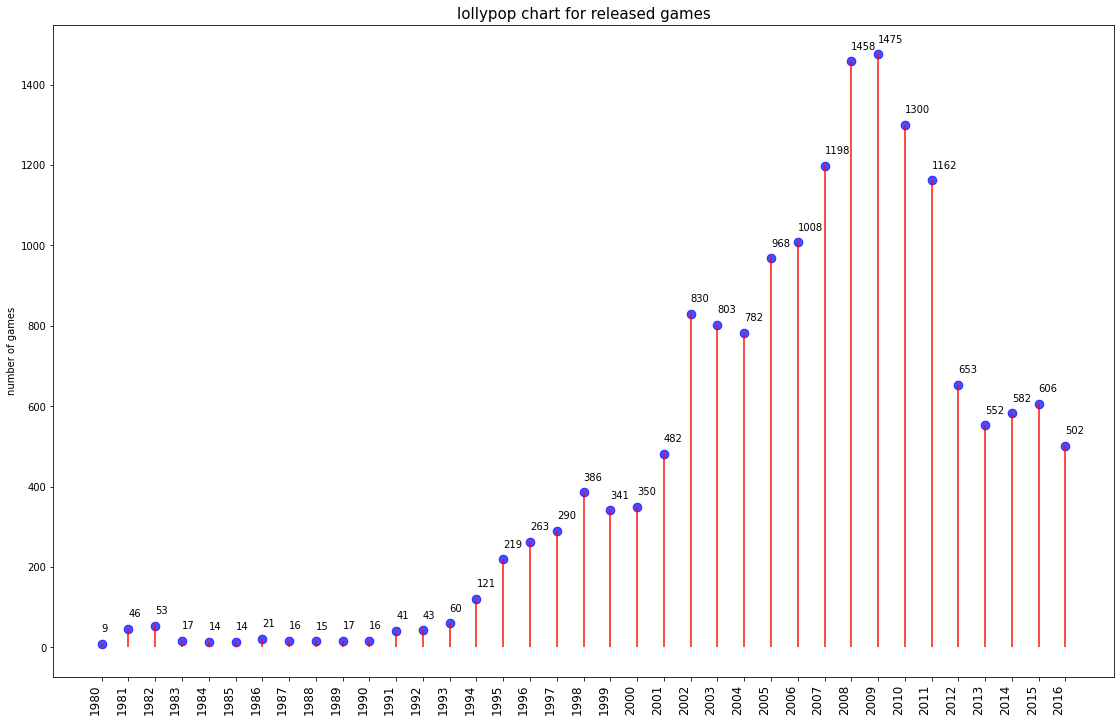

In [48]:
fig, ax=plt.subplots(figsize=(19,12))
ax.vlines(x=data_peroid.year_of_release, ymin=0, ymax=data_peroid.name, color='red', alpha=0.7, linewidth=2 )
ax.scatter(x=data_peroid.year_of_release, y=data_peroid.name,s=75,color='blue',alpha=0.7)

ax.set_title('lollypop chart for released games', fontdict ={'size':15})
ax.set_ylabel('number of games')
ax.set_xticks(data_peroid.year_of_release)
ax.set_xticklabels(data_peroid.year_of_release,rotation=90,fontdict={'horizontalalignment':'right','size':12})
for row in data_peroid.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2))


**we can see from the lollipop chart that data before 2000 is not useful for us, these are old games also,we could see how trends were changed.It is clearly visible that after 2008-2010 people play more in online games.**

<font color='green'><h3>Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?</h3></font>

In [49]:
data_platform = data[['platform','na_sales']].groupby(['platform']).sum().sort_values(by='na_sales').reset_index()
data_platform

,platform,na_sales
0,3DO,0.00
1,WS,0.00
2,TG16,0.00
3,GG,0.00
4,NG,0.00
5,PCFX,0.00
6,SAT,0.72
7,SCD,1.00
8,DC,5.43
9,PSV,12.58


In [50]:
data_platform['sales_z'] = (data_platform['na_sales'] - data_platform['na_sales'].mean())/data_platform['na_sales'].std()
data_platform

,platform,na_sales,sales_z
0,3DO,0.00,-0.802472
1,WS,0.00,-0.802472
2,TG16,0.00,-0.802472
3,GG,0.00,-0.802472
4,NG,0.00,-0.802472
5,PCFX,0.00,-0.802472
6,SAT,0.72,-0.798402
7,SCD,1.00,-0.796819
8,DC,5.43,-0.771776
9,PSV,12.58,-0.731357


In [51]:
data_platform['colors'] = ['red' if x<0 else 'green' for x in data_platform['sales_z']]
data_platform

,platform,na_sales,sales_z,colors
0,3DO,0.00,-0.802472,red
1,WS,0.00,-0.802472,red
2,TG16,0.00,-0.802472,red
3,GG,0.00,-0.802472,red
4,NG,0.00,-0.802472,red
5,PCFX,0.00,-0.802472,red
6,SAT,0.72,-0.798402,red
7,SCD,1.00,-0.796819,red
8,DC,5.43,-0.771776,red
9,PSV,12.58,-0.731357,red


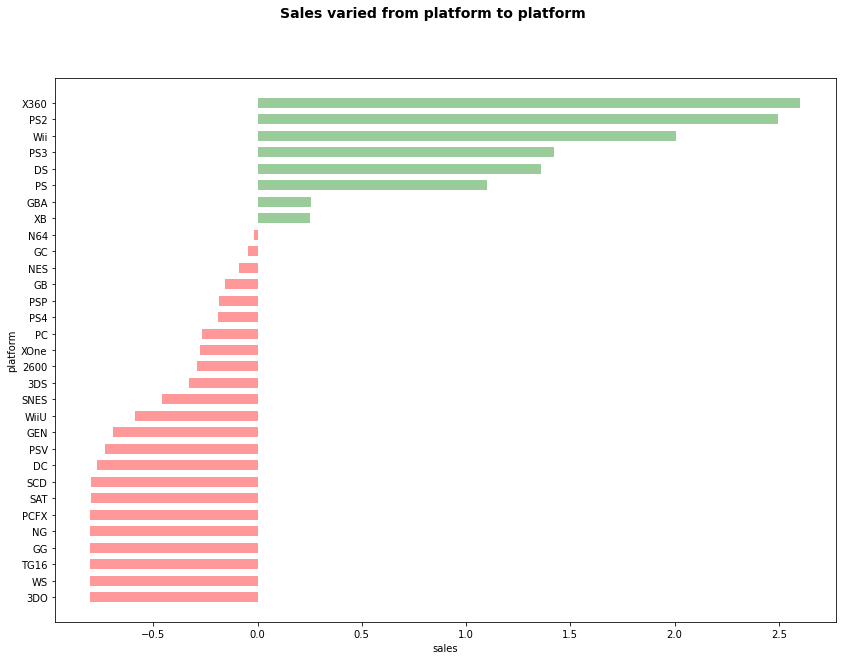

In [52]:
plt.figure(figsize =(14,10))
plt.hlines(y=data_platform.platform,xmax=data_platform.sales_z,xmin=0,color=data_platform.colors,alpha=0.4,linewidth=10)
plt.suptitle('Sales varied from platform to platform',fontsize=14, fontweight='bold') #title
plt.xlabel('sales') #x label
plt.ylabel('platform') #y label
plt.show()

**in this visulaisation we can see how the sales varied for different platforms.as X360 shows the highest sale with ps2 and wii simultaneously 

<font color='green'><h3>Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.</h3></font>

In [53]:
df_tree= data[['platform','na_sales']].groupby(['platform']).sum().sort_values(by='na_sales').reset_index()
df_tree = df_tree[df_tree['na_sales']!=0]
df_tree

,platform,na_sales
6,SAT,0.72
7,SCD,1.00
8,DC,5.43
9,PSV,12.58
10,GEN,19.27
11,WiiU,38.10
12,SNES,61.23
13,3DS,83.49
14,2600,90.60
15,XOne,93.12


In [54]:
sizes = df_tree.na_sales.values.tolist()
sizes

[0.7200000000000001,
 1.0,
 5.43,
 12.579999999999973,
 19.27,
 38.10000000000003,
 61.22999999999998,
 83.48999999999992,
 90.59999999999992,
 93.12000000000005,
 94.53000000000029,
 108.7400000000001,
 109.1699999999998,
 114.32000000000001,
 125.94000000000005,
 133.46000000000004,
 139.02000000000015,
 186.6900000000008,
 187.54000000000033,
 336.519999999998,
 382.39999999999793,
 393.48999999999995,
 496.8999999999991,
 583.8399999999925,
 602.4699999999993]

In [55]:
labels = df_tree.apply(lambda x: str(x[0]) +"\n" + "$"+ str(round(x[1])),axis=1)
labels
                       

6        SAT\n$1
7        SCD\n$1
8         DC\n$5
9       PSV\n$13
10      GEN\n$19
11     WiiU\n$38
12     SNES\n$61
13      3DS\n$83
14     2600\n$91
15     XOne\n$93
16       PC\n$95
17     PS4\n$109
18     PSP\n$109
19      GB\n$114
20     NES\n$126
21      GC\n$133
22     N64\n$139
23      XB\n$187
24     GBA\n$188
25      PS\n$337
26      DS\n$382
27     PS3\n$393
28     Wii\n$497
29     PS2\n$584
30    X360\n$602
dtype: object

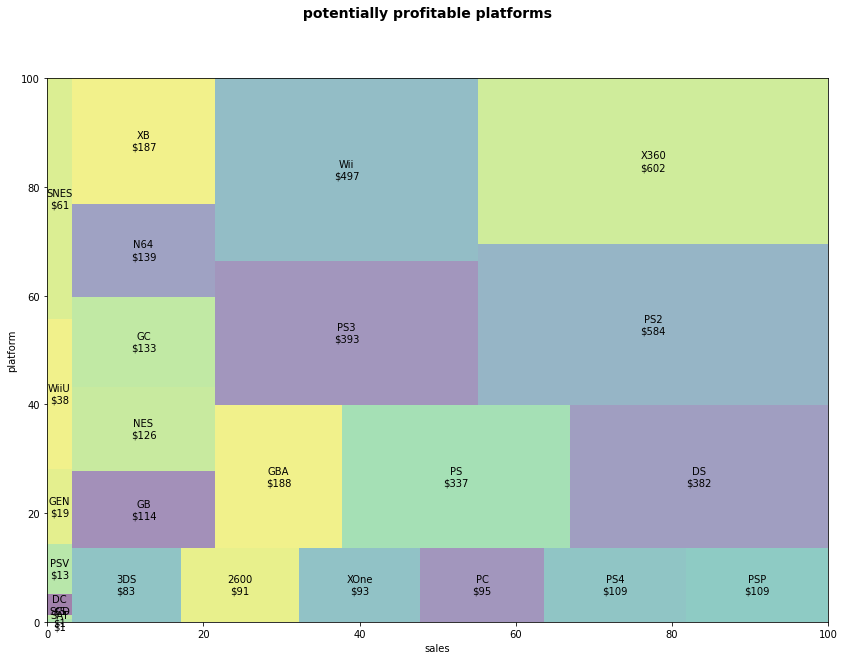

In [56]:
plt.figure(figsize =(14,10))
squarify.plot(sizes=sizes,label=labels,alpha=0.5)
plt.suptitle(' potentially profitable platforms',fontsize=14, fontweight='bold') #title
plt.xlabel('sales') #x label
plt.ylabel('platform') #y label
plt.show()

**we can see that x360 is most profitable on the basis of sales foloowed by wii and ps3**

In [57]:
data_new = data[data.year_of_release>=2014].reset_index()
#del data_new['Age']
del data_new['year_of_release_temp']
del data_new['clean']
data_new





,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,72.404902,72.404902,M,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,97.000000,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,71.877157,71.877157,T,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,82.000000,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,72.404902,72.404902,M,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,73.325593,73.325593,E,0.01
1686,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,71.877157,71.877157,E,0.01
1687,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,73.325593,73.325593,T,0.01
1688,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,73.325593,73.325593,E,0.01


In [58]:
df = pd.pivot_table(data_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [59]:
dynamics = df-df.shift(+1)
dynamics =dynamics.T
dynamics

year_of_release,2014,2015,2016
platform,,,
3DS,NaN,-15.98,-12.64
PC,NaN,-4.76,-3.27
PS3,NaN,-30.94,-13.22
PS4,NaN,18.90,-49.65
PSP,NaN,-0.12,-0.12
PSV,NaN,-5.91,-2.00
Wii,NaN,-2.61,-0.96
WiiU,NaN,-5.68,-11.75
X360,NaN,-22.78,-10.44


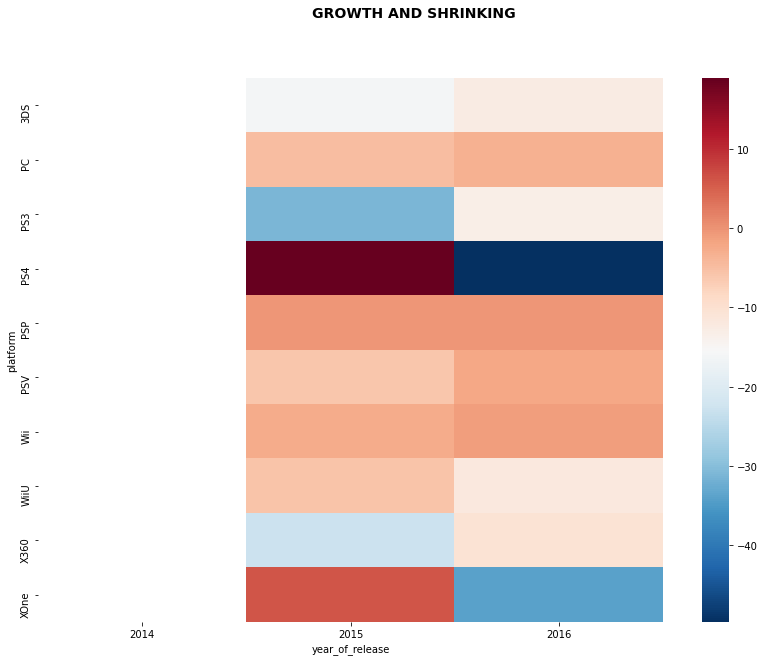

In [60]:
plt.figure(figsize =(14,10))
sns.heatmap(dynamics,cmap='RdBu_r')
plt.suptitle('GROWTH AND SHRINKING ',fontsize=14, fontweight='bold') #title
plt.show()

**We can see from this graphs the growth and shrinking on the basis of total_sales wii .we took the data from the year 2014 as beacause data before that it shows gradual increase in the use of games from 1980 to 2010 then it is decreasing from 2010 to 2014 .as the stability is maintained from 2014 and it is the new data.old data is maximum missing and corrupted.so the analysis will be better if done from 2014 .for the growth and shrinking it can be seen that sales in 2016 is decreasing when compared with 2014 and 2015 .ps4 there is decrease in sales from 2015 to 2016 .wii,X360,ps3 shows increase in sales from previous years

<font color='green'><h3> Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.</h3></font>

In [61]:
grouped_data = data_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
grouped_data                                 
                               

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Honto no Kimochi,0.07
4,3DS,12-Sai. Koisuru Diary,0.05
...,...,...,...
1685,XOne,Wolfenstein: The Old Blood,0.15
1686,XOne,Worms: WMD,0.01
1687,XOne,XCOM 2,0.04
1688,XOne,ZombiU,0.01


In [62]:
ordered = grouped_data.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered

0     PSP
1     Wii
2     PSV
3      PC
4    WiiU
5    X360
6     PS3
7     3DS
8    XOne
9     PS4
Name: platform, dtype: object

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

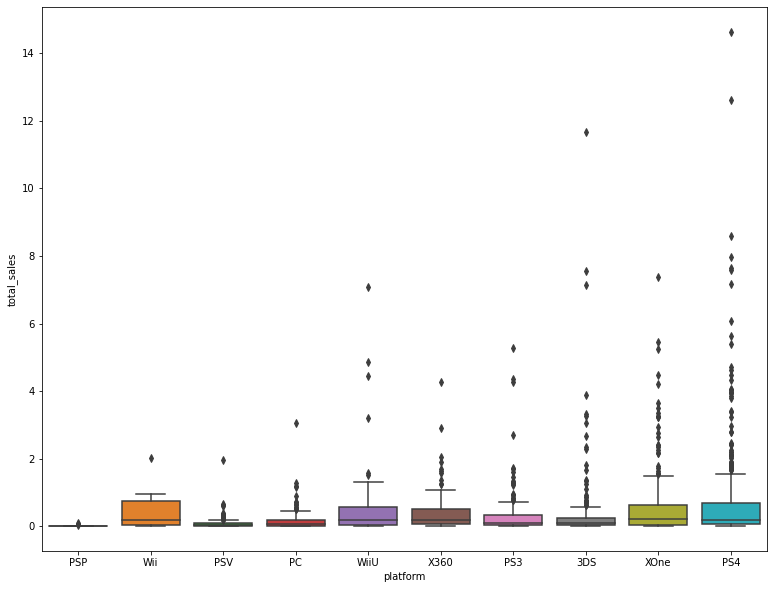

In [63]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped_data,order=ordered)

while looking into visulasation it can be seen that XB,XOne and etc.)+PS4, Wii are most valuable. Some old plaforms, psp, psv, pc have sligtly visible sales comparing to others platforms

<font color='green'><h3>Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.<\h3></font>

In [64]:
x_scatter = data_new[data_new["platform"].isin(["XOne", "XB", "X360"])].dropna()

<AxesSubplot:title={'center':'Xbox series platform'}, xlabel='user_score', ylabel='total_sales'>

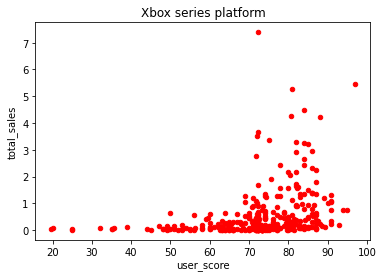

In [65]:
x_scatter.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox series platform', color='red')

In [66]:
top_games = (data_new
 .pivot_table(index='name', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)).head(10)
top_games

,total_sales
name,
Call of Duty: Black Ops 3,25.67
Call of Duty: Advanced Warfare,21.97
Grand Theft Auto V,19.26
FIFA 15,17.37
FIFA 16,16.30
Minecraft,14.98
Fallout 4,12.67
Destiny,12.54
Super Smash Bros. for Wii U and 3DS,12.42


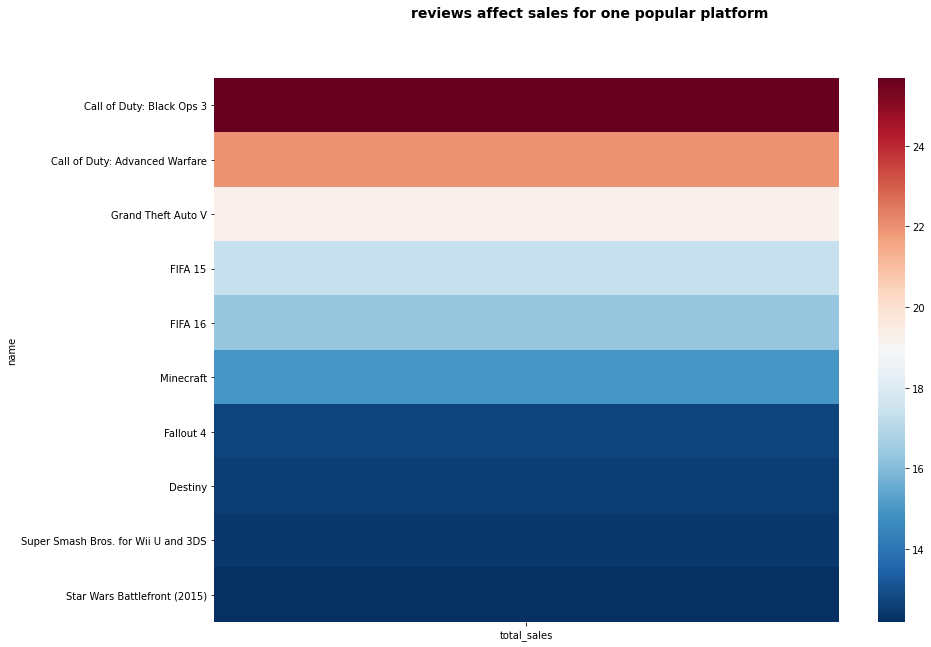

In [67]:
plt.figure(figsize =(14,10))
sns.heatmap(top_games,cmap='RdBu_r')
plt.suptitle('reviews affect sales for one popular platform ',fontsize=14, fontweight='bold') #title
plt.show()

**call of duty:blackop3 shows the highest visualisation followed  by advanced warfare**

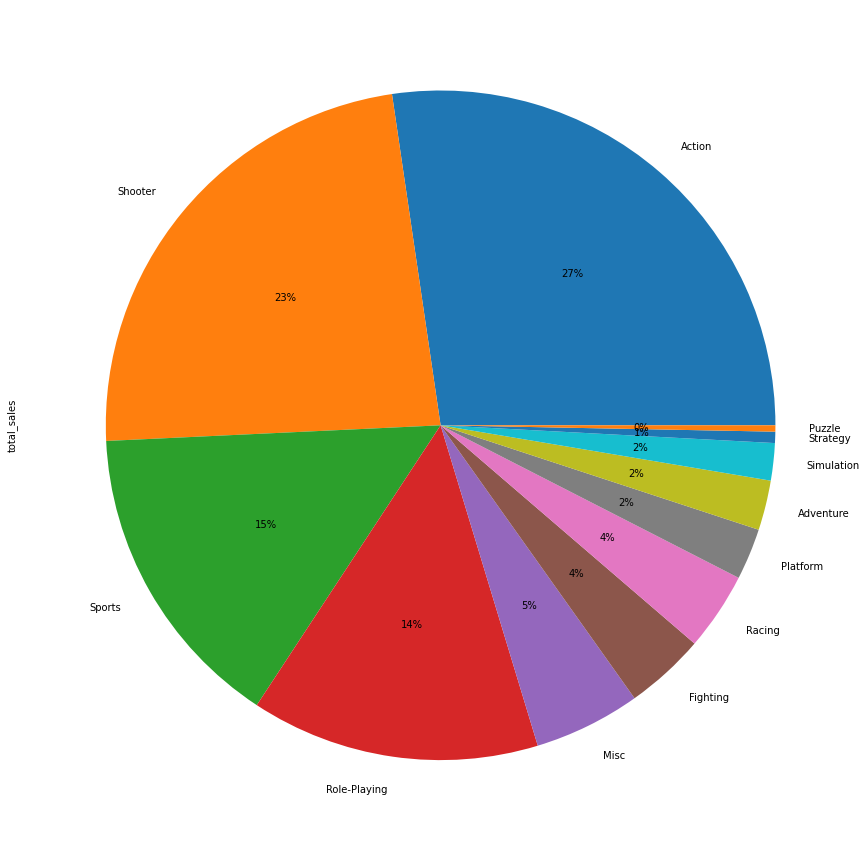

In [68]:
data_genre = (data_new
            .pivot_table(index="genre", aggfunc='sum')
            .sort_values("total_sales", ascending=False)
            .head(20))
data_genre.plot(kind='pie', y="total_sales",autopct='%1.0f%%', figsize=(15, 18), legend=False).set(label=data.index)
plt.show()

**as it is clearly visible that action and shooter  genre is highest while strategy and adventure is lowest on the number of sales**

**CONCLUSION**

IN THIS STEP WE ANALYZED THE DATA
we Looked at how many games were released in different years.then how sales varied from platform to platform. Choosen the platforms with the greatest total sales and build a distribution based on data for each year.
Worked only with the data that you've decided is relevant. Disregard the data for previous years.Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.Builded a box plot for the global sales of all games, broken down by platform. 
Take a look at how user and professional reviews affect sales for one popular platform (you choose). Building a scatter plot and calculating the correlation between reviews and sales.
Keeping your conclusions in mind, compare the sales of the same games on other platforms.
Taking a look at the general distribution of games by genre.we generalized genres with high and low sales hence various conclusions are drawn
* we can see from the lollipop chart that data before 2000 is not useful for us, these are old games also,we could see how trends were changed.It is clearly visible that after 2008-2010 people play more in online games.
* in the second visulaisation we can see how the sales varied for different platforms.as X360 shows the highest sale with ps2 and wii simultaneously 
* We can see from this graphs the growth and shrinking on the basis of total_sales wii shows the highest in the year 2006.Xb and ps almost fades away .ps3 shows the good growing stage with smooth representation
* we can see that x360 is most profitable on the basis of sales foloowed by wii and ps3
* it is clearly visible that action genre is highest while strategy and adventure is lowest on the number of sales
* looking into boxplots it can be seen that XB,XOne and etc.)+PS4, Wii are most valuable. Some old plaforms, DC, N64, WS have sligtly visible sales comparing to others platforms

## Step 4. Create a user profile for each region

<font color='green'><h3>For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?</h3></font>

In [69]:
def plot_top_sales_by_region_barplot(data_new, column, region, n=5):
    top_data = (data_new
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(n)).reset_index()
    sns.set_color_codes("pastel")
    sns.barplot(y=top_data[column], x=top_data[region], data=top_data, label="sales")
    plt.title('TOP 5 VARIATIONS IN MARKET SHARE',fontsize=14, fontweight='bold')
    sns.set_color_codes("muted")
    plt.show()

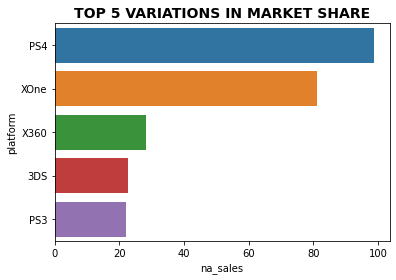

In [70]:
#plotting barplot on the basis of platform
#plt.figure(figsize =(8,6))
plot_top_sales_by_region_barplot(data_new, 'platform', region = 'na_sales')
#plt.title('TOP PLATFORM FOR NA REGION ON NA_SALES',fontsize=14, fontweight='bold') #title
#plt.xlabel('na_sales') #x label
#plt.ylabel('platform') #y label
#plt.show()

Here we can see that on the basis of na_sales the top platforms are ps4 followed by xone and x360 .

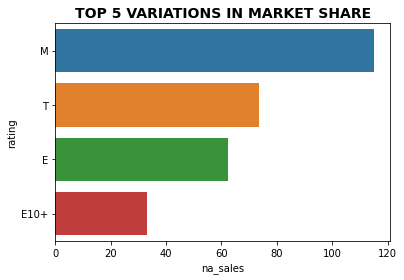

In [71]:
#plotting barplot on the basis of rating
plot_top_sales_by_region_barplot(data_new, 'rating', region = 'na_sales')

on the basis of rating top ratings are M and T E10 is at the lowest

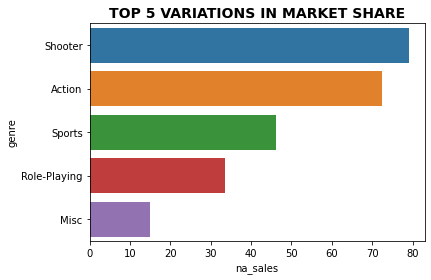

In [72]:
#plotting barplot on the basis of genre
plot_top_sales_by_region_barplot(data_new, 'genre', region = 'na_sales')

here we can see that shooter and action are the highest in the market well they does not show large difference ,misc is at the lowest

**EUROPEAN SALES**

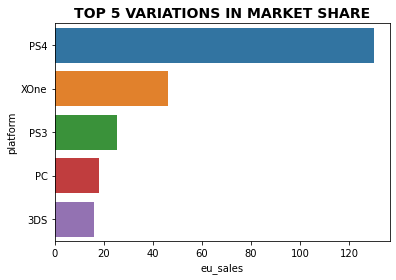

In [73]:
#plotting barplot on the basis of platform
plot_top_sales_by_region_barplot(data_new, 'platform', region = 'eu_sales')

for european sales the top platforms are ps4 followed by xone and ps3.as ps4 and xone shows the great difference 

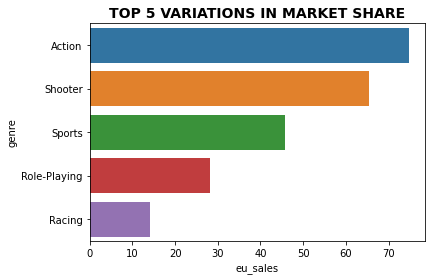

In [74]:
#plotting barplot on the basis of genre
plot_top_sales_by_region_barplot(data_new, 'genre', region = 'eu_sales')

variations in genre for eu platform shows that highest genres rae action and shooter 

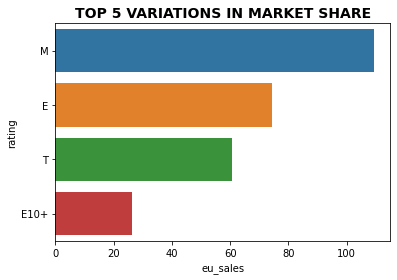

In [75]:
#plotting barplot on the basis of rating
plot_top_sales_by_region_barplot(data_new, 'rating', region = 'eu_sales')

top market share for rating in eu sales shows highest for M and E While e10 is at the lowest

**japan sales**

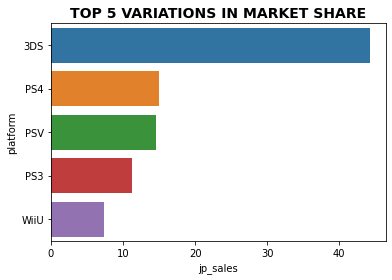

In [76]:
#plotting barplot on the basis of platform
plot_top_sales_by_region_barplot(data_new, 'platform', region = 'jp_sales')

for japan sales 3ds and ps4 platfroms are the highest in the market while wiiu is at the 5 number

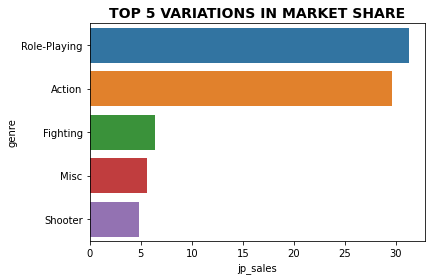

In [77]:
#plotting barplot on the basis of genre
plot_top_sales_by_region_barplot(data_new, 'genre', region = 'jp_sales')

for japan sales the top genre is role playing and action while fighing misc and shooter doesnot show larger difference

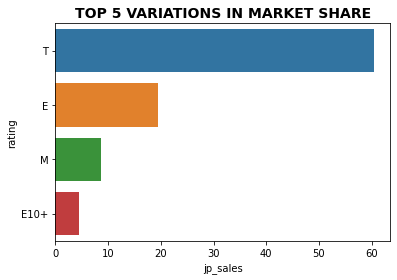

In [78]:
#plotting barplot on the basis of rating
plot_top_sales_by_region_barplot(data_new, 'rating', region = 'jp_sales')

for japan sales there is a large variation between T and E10 while T and E are showing the top list rating 

**CONCLUSION**

**IN USA:**
1. In the USA ps4 is popular, second one is xone. both of company have long story of competition at the USA market
2.  shooter ,action and Sports
3. M AND T shows the highest rating

**IN Europe:**
1.  Ps4/xone
2.  action and shooter are the highest.
3.  M and E

**IN Japan:**
1.  DS and PS are popular 
2.  Role playing is the most popular genre
3.  T,E AND M

## Step 5. Test the following hypotheses:

<font color='green'><h3>Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.
Explain:
—How you formulated the null and alternative hypotheses
—What significance level you chose to test the hypotheses, and why</h3></font>

$H_0$:—Average user ratings of the Xbox One and PC platforms are the same.

and

$H_1$: —Average user ratings of the Xbox One and PC platforms are different.
alpha= 0.05

In [79]:
from scipy import stats
from scipy.stats import f as f_test
alpha=0.05

In [80]:
H_0 = "Average user ratings of the Xbox One and PC platforms are the same."
H_1 = "Average user ratings of the Xbox One and PC platforms are different."

pc = data[data["platform"] == 'PC']['user_score'].values
xbox = data[data["platform"].isin([ "XOne"])]['user_score'].values

result = stats.ttest_ind(pc, xbox)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print(H_1)
else:
    print(H_0)
print("checking:")
print(f"pc mean={pc.mean()}")
print(f"xbox mean={xbox.mean()}")

pvalue: 0.4469514379422954
Average user ratings of the Xbox One and PC platforms are the same.
checking:
pc mean=74.14414413791141
xbox mean=73.55596445818244


In [81]:
pc = stats.norm.rvs(data[data["platform"] == 'PC']['user_score'].values)

xbox = stats.norm.rvs(data[data["platform"].isin([ "XOne"])]['user_score'].values)
stats.ttest_ind(pc,xbox)


Ttest_indResult(statistic=0.8336095045844842, pvalue=0.40466437694623625)

In [82]:
stats.ttest_ind(pc,xbox, equal_var = False)

Ttest_indResult(statistic=0.7811207514033276, pvalue=0.4352553711916466)

In [83]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

$H_0$:—.Average user ratings for the Action and Sports genres are the same.

and

$H_1$: —Average user ratings for the Action and Sports genres are different.
alpha= 0.05

In [84]:
alpha=0.05
H_0 = "Average user ratings for the Action and Sports genres are the same."
H_1 = "Average user ratings for the Action and Sports genres are different."

Action = data[data["genre"] == 'Action']['user_score'].values
Sports = data[data["genre"] == 'Sports']['user_score'].values

result = stats.ttest_ind(Action, Sports)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print(H_1)
else:
    print(H_0)
print("checking:")
print(f"action mean={Action.mean()}")
print(f"sports mean={Sports.mean()}")

pvalue: 6.132461204611819e-19
Average user ratings for the Action and Sports genres are different.
checking:
action mean=68.32007683970387
sports mean=71.15819635877466


**CONCLUSION**

**IN This step  we calculated average user ratings of the Xbox One and PC platforms are the same. —Average user ratings for the Action and Sports genres are different. 
1. Set the alpha threshold value to 0.05.
2. calculated the hypothesis by checking stats .ttest first for xbox and pc and then for action and sports 
3. find out that average user ratings of the Xbox One and PC platforms are the same with
pc mean=74.14414413791141
xbox mean=73.55596445818244
4. find out that average user ratings for the Action and Sports genres are different with
action mean=68.32007683970387
sports mean=71.15819635877466

## Step 6. Write a general conclusion

**We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. we need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
In front of us is data going back to 2016. we have to imagine that it’s December 2016 and you’re planning a campaign for 2017.**
* the data in th table contains Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score	User_Score and Rating
* Data description
—Name (name of games)
—Platform
—Year_of_Release( the year in which it was released)
—Genre
—NA_sales (North American sales in USD million)
—EU_sales (sales in Europe in USD million)
—JP_sales (sales in Japan in USD million)
—Other_sales (sales in other countries in USD million)
—Critic_Score (maximum of 100)
—User_Score (maximum of 10)
—Rating (ESRB)
* firstly we checked the basis information of the data in the first step while looking into major information,we can see that there is 16715 entries and 11 columns(Name,Platform,Year_of_Release,Genre NA_sales,EU_sales,JP_sales,EU_sales,Other_sales,Critic_score,User_score,Rating .there is lot of missing entries and lot of 0 entries in NA_sales,EU_SALES;JP_sales,Other_sales.there are 8837 rows with missing values and the number of rows without missing values are 7878
* Secondly we prepared the data 
 1. Replaced the column names by str.lower . 
 2.  Converted the datatype of year_of_release to the int. 
 3. Described the columns where the data types have been changed and why. extracted the values from name column where the year is written and replacing into null values of year_of_release_temp then cleaning the data by making function chk_year. then replacing the missing values in year of release with the data cleaned above.filled the rest of the year_of_release by grouping them on the basis of platform and using function median. replacing the value in TBD by 0.dropping the data where genre is null.replacing the null values in critic_score with mean by grouping them on the basis of name and the rest of the values by year_of_release and genre grouping.replacing the userscore by grouping them on the basis of year_of_release and filling the values of rating by taking common values on the basis of genre by using lambda function 
 4. Calculated the total sales by total_sales by adding all the data from four columns na_sales,eu_sales,jp_sales and other_sales
* Thirdly N THIS STEP WE ANALYZED THE DATA we Looked at how many games were released in different years.then how sales varied from platform to platform. Choosen the platforms with the greatest total sales and build a distribution based on data for each year. Worked only with the data that you've decided is relevant. Disregard the data for previous years.Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.Builded a box plot for the global sales of all games, broken down by platform. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Building a scatter plot and calculating the correlation between reviews and sales. Keeping your conclusions in mind, compare the sales of the same games on other platforms. Taking a look at the general distribution of games by genre.we generalized genres with high and low sales hence various conclusions are drawn
* Fourthly we created the user profile  For each region (NA, EU, JP), determined: The top five platforms,variations in their market shares from region to region. 
* fifthly we tested the hypothesis we calculated average user ratings of the Xbox One and PC platforms are the same. —Average user ratings for the Action and Sports genres are different.

**Hence it can be concluded while carrying out different calculations that there is multiple relationships between different columns and the test results shows there data is corrupted and thre is a lot of missing values in it data before 2000 is totally corrupted for various platforms with different genres.therefore the results for this project are**

1. We can see from the lollipop chart that data before 2000 is not useful for us, these are old games also,we could see how trends were changed.It is clearly visible that after 2008-2010 people play more in online games.
in the second visulaisation we can see how the sales varied for different platforms.We can see from this graphs the growth and shrinking on the basis of total_sales wii .we took the data from the year 2014 as beacause data before that it shows gradual increase in the use of games from 1980 to 2010 then it is decreasing from 2010 to 2014 .as the stability is maintained from 2014 and it is the new data.old data is maximum missing and corrupted.so the analysis will be better if done from 2014 .for the growth and shrinking it can be seen that sales in 2016 is decreasing when compared with 2014 and 2015 .ps4 there is decrease in sales from 2015 to 2016 .wii,X360,ps3 shows increase in sales from previous years
2. while looking into visulasation of boxplots it can be seen that XB,XOne and etc.)+PS4, Wii are most valuable. Some old plaforms, psp, psv, pc have sligtly visible sales 

3. **IN USA:**
  * In the USA ps4 is popular, second one is xone. both of company have long story of competition at the USA market
  * shooter ,action and Sports
  * M AND T shows the highest rating

  **IN Europe:**
  * Ps4/xone
  * action and shooter are the highest.
  * M and E
  
  **IN Japan:**
  * DS and PS are popular 
  * Role playing is the most popular genre
  * T,E AND M
4. Set the alpha threshold value to 0.05.
calculated the hypothesis by checking stats .ttest first for xbox and pc and then for action and sports
find out that average user ratings of the Xbox One and PC platforms are the same with pc mean=74.14414413791141 xbox mean=73.55596445818244
find out that average user ratings for the Action and Sports genres are different with action mean=68.32007683970387 sports mean=71.15819635877466

